## CLT - Central Limit Theoram

In [68]:
import pandas as pd,numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

In [69]:
dataall = pd.read_csv("BlackFriday.csv")
#data taken from https://www.kaggle.com/llopesolivei/blackfriday

In [70]:
dataall.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,NaN,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.0,NaN,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,NaN,NaN,7871


In [71]:
dataall.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.375770e+05,537577.00000,537577.000000,537577.000000,370591.000000,164278.000000,537577.000000
mean,1.002992e+06,8.08271,0.408797,5.295546,9.842144,12.669840,9333.859853
std,1.714393e+03,6.52412,0.491612,3.750701,5.087259,4.124341,4981.022133
min,1.000001e+06,0.00000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001495e+06,2.00000,0.000000,1.000000,5.000000,9.000000,5866.000000
50%,1.003031e+06,7.00000,0.000000,5.000000,9.000000,14.000000,8062.000000
75%,1.004417e+06,14.00000,1.000000,8.000000,15.000000,16.000000,12073.000000
max,1.006040e+06,20.00000,1.000000,18.000000,18.000000,18.000000,23961.000000


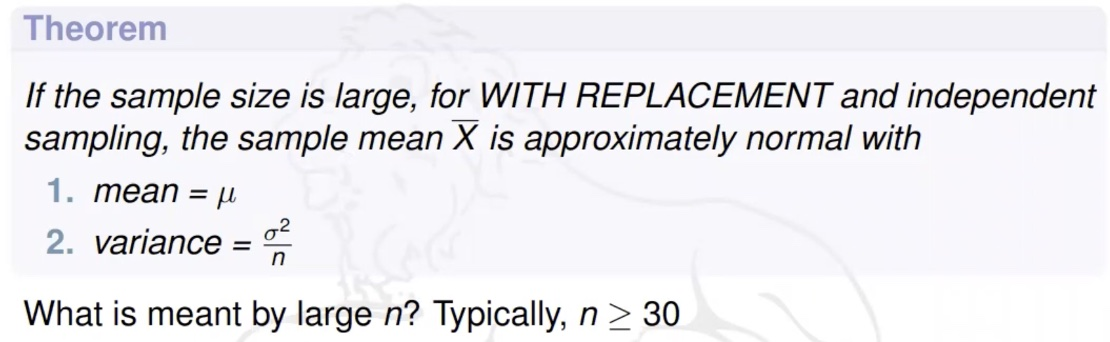

### Actual Data

In [77]:
#Take purchase data and pick a random sample from it to find the mean
purchasedata = dataall['Purchase']
purchasedata

0          8370
1         15200
2          1422
3          1057
4          7969
          ...  
537572    11664
537573    19196
537574     8043
537575     7172
537576     6875
Name: Purchase, Length: 537577, dtype: int64

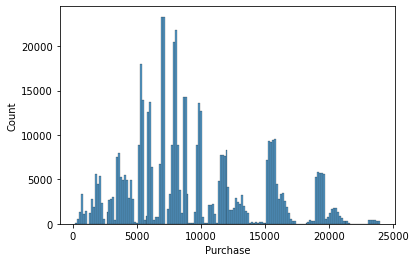

In [78]:
sns.histplot(purchasedata)
plt.show()

In [11]:
# Actual data (5Lakh) mean and variance calculation

In [81]:
print(type(purchasedata))
purchasedata1 = purchasedata.tolist()
print(type(purchasedata1))

<class 'pandas.core.series.Series'>
<class 'list'>


In [90]:
# True average/mean (population)
m_pop = sum(purchasedata1)/len(purchasedata1)
m_pop

9333.859852635065

In [91]:
# True variance (population)
var_pop = np.var(purchasedata1)
var_pop

24810535.333403956

### Random Samples of 500 from actual data 

- Take random samples of 500 from a population of 5 Lakh. 
- 500 samples taken by 1 person and compute avg of these 500 samples.
- 500 samples taken by 2nd person and compute avg of these 500 samples.
- These samples as well as avg's will be different depending on how many times collected, each person gets different random no's and hence different avg.
- THese avg u r getting can be said to be a random variable as every time a different person does we get a different value.
- This Random variable (consisting of different avg's) will appx. follow a normal distribution with mean(sample) = mu(population) and var(sampling) = var(population)/n(sample size)

### To Verify CLT results -

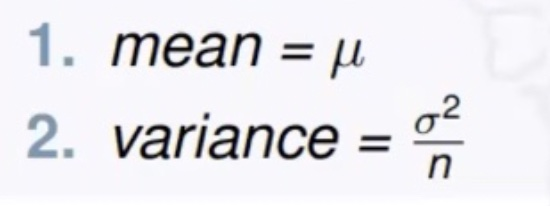


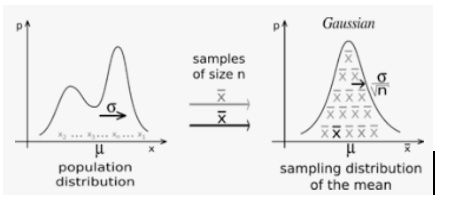

#### Random sample size = 500

In [95]:
n=500   # sample size
randsample = random.sample(purchasedata1,n)

In [96]:
print(randsample)

[1036, 5850, 19394, 15529, 16212, 1991, 5462, 16035, 13101, 6886, 13468, 5142, 16027, 9840, 10047, 15383, 5139, 9946, 3187, 15575, 3473, 16181, 15387, 6890, 5891, 10874, 7805, 16812, 15324, 19076, 7152, 20213, 9836, 11491, 5206, 8824, 19633, 8846, 4245, 9945, 5361, 2029, 7584, 8076, 4415, 8717, 16762, 7050, 7805, 8178, 9771, 7055, 5306, 8745, 6967, 8841, 5856, 8208, 3702, 9791, 8220, 8050, 2062, 4179, 8637, 6949, 5146, 9801, 1968, 6199, 12091, 3480, 7823, 1728, 19058, 12809, 6952, 11625, 4026, 5377, 8796, 19376, 4059, 8686, 15343, 7009, 11039, 3542, 10045, 7168, 8335, 12754, 5146, 7634, 8132, 20484, 7035, 8754, 5462, 10773, 3463, 5373, 12029, 20025, 20115, 7101, 16526, 10041, 6857, 10088, 5978, 6890, 5393, 5418, 20712, 18570, 4515, 3529, 7732, 5264, 3146, 15616, 6950, 11436, 12799, 7087, 13305, 7637, 5202, 3948, 16335, 7904, 9716, 8749, 19508, 5898, 11859, 4484, 3956, 9765, 14277, 16371, 11394, 8700, 9810, 12006, 6891, 15829, 9912, 1451, 8634, 7978, 15443, 11525, 15726, 6013, 23219, 81

In [97]:
# CLT tries to explain the distribution of this random variable X_avg and this X_avg will take
# different value with every different 500 samples.

Xavglist = []
for i in range(100000): # larger number u take here, closer u will come to distribution.
    randsample = random.sample(purchasedata1,500) # take 500 random sample from actual data
    X_avg = sum(randsample)/len(randsample)   # avg value of randsample
    Xavglist.append(X_avg)
    
print(len(Xavglist))   

100000


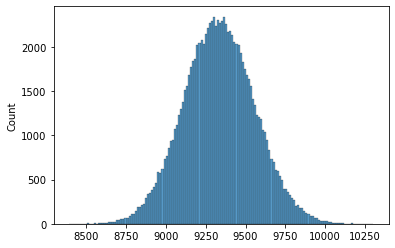

In [98]:
# As per CLT the Xavglist should follow a normal distribution with mean same as population mean
# & variance(sample/Xavglist) = var(pop)/num of samples.

# Although from shape looks like ND, but we verify by checking % data (within 1std,2std,3std)  
# using (mean and var as claimed by CLT)for Xavg random variable/sample.

sns.histplot(Xavglist)
plt.show()

As per CLT PROVE THAT-
1. mean(Xavglist) appx should be equal to m_pop<br>


2. var(Xavglist) appx should be equal to var(pop)/num of samples.

In [99]:
# Check for mean

Xavglist_mean = sum(Xavglist)/len(Xavglist)
Xavglist_mean


9334.024613859898

In [104]:
# Check for Xavglist_var variance

Xavglist_var = np.var(Xavglist)
print('actual sample variance',Xavglist_var)

# This variance should be var_pop/n
var_expected = var_pop/n
print('expected var_pop/n as per CLT',var_expected)

actual sample variance 49753.895080699236
expected var_pop/n as per CLT 49621.070666807915


**Hence both 1 and 2 points as claimed by CLT are proved above!**

Also we show that Xavglist random variable is normally distributed by-

1. Looking at qualitative plot of Xavglist random variable which should be bell shaped
2. By showing that within 1,2,3 std of this plot we have 68%,95.4%, 99.7% of data coverage.<br>


You can prove any ways as below- (using actual Xavglist mean and Xavglist variance or using m_pop & var_pop/n instead) as both should be same as per CLT.<br>
**0.5 for under root

In [108]:
# Check for 1 std
count1 = 0
for i in Xavglist:   # for Xavglist,mean=m_pop and var= var_pop/n as per CLT
    if i<=m_pop+1*(var_pop/n)**0.5 and i>=m_pop-1*(var_pop/n)**0.5:
        count1 = count1 +1
count1

68286

In [110]:
# Check for 1 std
count1 = 0
for i in Xavglist:   # for Xavglist,mean=m_pop and var= var_pop/n as per CLT
    if i<=Xavglist_mean+1*(Xavglist_var)**0.5 and i>=Xavglist_mean-1*(Xavglist_var)**0.5:
        count1 = count1 +1
count1

68359

In [111]:
# Check for 2 std
count2 = 0
for i in Xavglist:
    if i<=Xavglist_mean+2*(Xavglist_var)**0.5 and i>=Xavglist_mean-2*(Xavglist_var)**0.5:
        count2 = count2 +1
count2

95379

In [112]:
# Check for 3 std
count3 = 0
for i in Xavglist:
    if i<=Xavglist_mean+3*(Xavglist_var)**0.5 and i>=Xavglist_mean-3*(Xavglist_var)**0.5:
        count3 = count3 +1

In [113]:
count3

99743

### Try with other random sample size = 100 to prove CLT 

In [119]:
n1=100
Xavglist1 = []
for i in range(100000):
    randsample1 = random.sample(purchasedata1,n1)
    X_avg1 = sum(randsample1)/len(randsample1)
    Xavglist1.append(X_avg1)

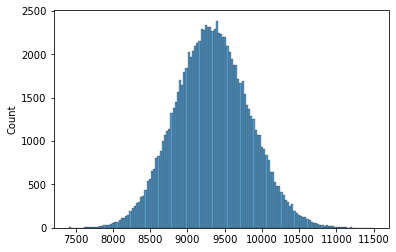

In [121]:
sns.histplot(Xavglist1)
plt.show()

In [126]:
print('Population mean',m_pop)
print('Population variance',var_pop)

print('\nExpected mean as per CLT',m_pop)
print('Expected variance as per CLT',var_pop/n1)

print('\nSample mean of averages',sum(Xavglist1)/len(Xavglist1))
print('Variance of averages',np.var(Xavglist1))


Population mean 9333.859852635065
Population variance 24810535.333403956

Expected mean as per CLT 9333.859852635065
Expected variance as per CLT 248105.35333403957

Sample mean of averages 9335.41137790001
Variance of averages 247691.6204562824


**As per results above CLT is proved!**

### Many random samples together (n1,n2,n3,n4) of different sizes to check CLT still holds true irrespective of sample size until sample size >= 30

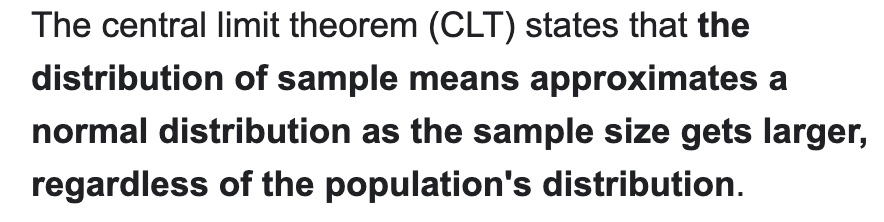

In [129]:
n1 = 30
n2 = 50
n3 = 100
n4 = 500
avg1 = []
avg2 = []
avg3 = []
avg4 = []
for i in range(100000):
    randsample1 = random.sample(purchasedata1,n1)
    randsample2 = random.sample(purchasedata1,n2)
    randsample3 = random.sample(purchasedata1,n3)
    randsample4 = random.sample(purchasedata1,n4)
    avg1.append(sum(randsample1)/len(randsample1))
    avg2.append(sum(randsample2)/len(randsample2))
    avg3.append(sum(randsample3)/len(randsample3))
    avg4.append(sum(randsample4)/len(randsample4))
dataavg = pd.DataFrame({'avg1' : avg1,'avg2' : avg2,'avg3' : avg3 ,'avg4' : avg4  })

In [133]:
dataavg

,avg1,avg2,avg3,avg4
0,9556.300000,9626.84,9913.30,9221.908
1,8091.366667,8950.76,9668.01,9350.840
2,8350.433333,8507.60,8801.30,9092.280
3,8841.200000,8772.86,9594.94,9384.988
4,9372.500000,10190.94,8809.89,9109.132
...,...,...,...,...
99995,9045.666667,9567.18,9066.75,9294.878
99996,9640.500000,10079.18,9155.12,9426.240
99997,8710.933333,9920.92,8943.75,9468.254
99998,9197.633333,10179.14,8749.47,9219.018


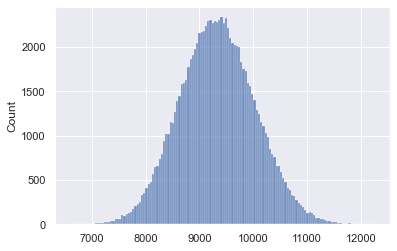

In [134]:
sns.histplot(avg2)
plt.show()

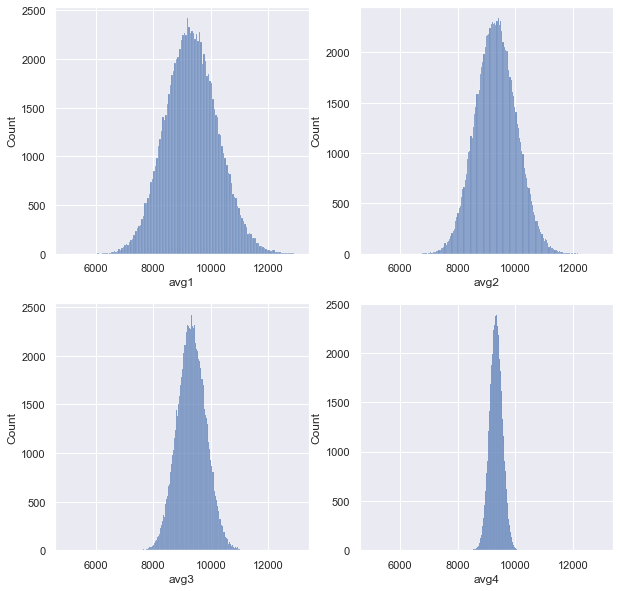

In [135]:
sns.set(style = "darkgrid")

fig, axs = plt.subplots(2,2, figsize = (10,10))
sns.histplot(data= dataavg, x = 'avg1',  binrange = [5000,13000], ax = axs[0,0])

sns.histplot(data= dataavg,x = 'avg2', binrange = [5000,13000],ax = axs[0,1])

sns.histplot(data= dataavg,x = 'avg3', binrange = [5000,13000],ax = axs[1,0])

sns.histplot(data= dataavg,x = 'avg4',binrange = [5000,13000],ax = axs[1,1])

plt.show()

# As seen in below plots, all averages of different sizes random samples still show 
# normal distribution.